In [32]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra

In [33]:
ctx = straxbra.XebraContext()

In [34]:
run = '00093'
peaks_data = ctx.get_array(run, 'peaks')

In [35]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']

In [36]:
def CutCondition(waveform):  
    FirstPeak_area = sum(waveform[:15])
    SecondPeak_area = sum(waveform[15:])    
    if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
        return(True)
    else:
        return(False)

In [37]:
def S2_found(integral, width):
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [55]:
def PrintWaveform(waveform):

    fig, (ax1) = plt.subplots(1, 1, sharex=False, figsize=(12, 3.5))

    ax1.plot(waveform)
#     ax2.plot(waveform)
#     ax3.plot(waveform)
#     ax1.set_xlim([0, 50])
    plt.show()


In [64]:
def Process(waveform,i):

    CutFlag = CutCondition(waveform[i])
    if CutFlag == True:
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 55000
        while threshold_timestamp >= counter_timestamp and S2_found(integral = integral[i+j], width = width[i+j]) == False: 
            j += 1
            counter_timestamp = timestamp[i+j]           
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):
                #PrintWaveform(waveform[i+j])
                kr_s2_area.append(integral[i+j])
                kr_s2_width.append(width[i+j])
#                 PrintWaveform(waveform[i+j])
         
                m = 1
                counter_timestamp_trains = timestamp[i+j+m]
                threshold_timestamp_trains = timestamp[i+j] + 1000000
                while threshold_timestamp_trains >= counter_timestamp_trains and integral[i+j+m] <=200 and width[i+j+m] >= width[i+j+m] <=1000:
#                 while threshold_timestamp_trains >= counter_timestamp_trains and CutCondition(waveform = waveform[i+j+m]) == False and S2_found(integral = integral[i+j+m], width = width[i+j+m]) == False:
                    trains_area.append(integral[i+j+m])
                    trains_width.append(width[i+j+m])

                    
                    m += 1
                    counter_timestamp_trains = timestamp[i+j+m]
                    
                else:
                    return
                

In [65]:
num = len(waveform)
kr_s2_area = []
kr_s2_width = []

trains_area = []
trains_width = []
print_counter = 0.0
for i in range(0,num):
    
    Process(waveform,i)   
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
        
print(1.0)




0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


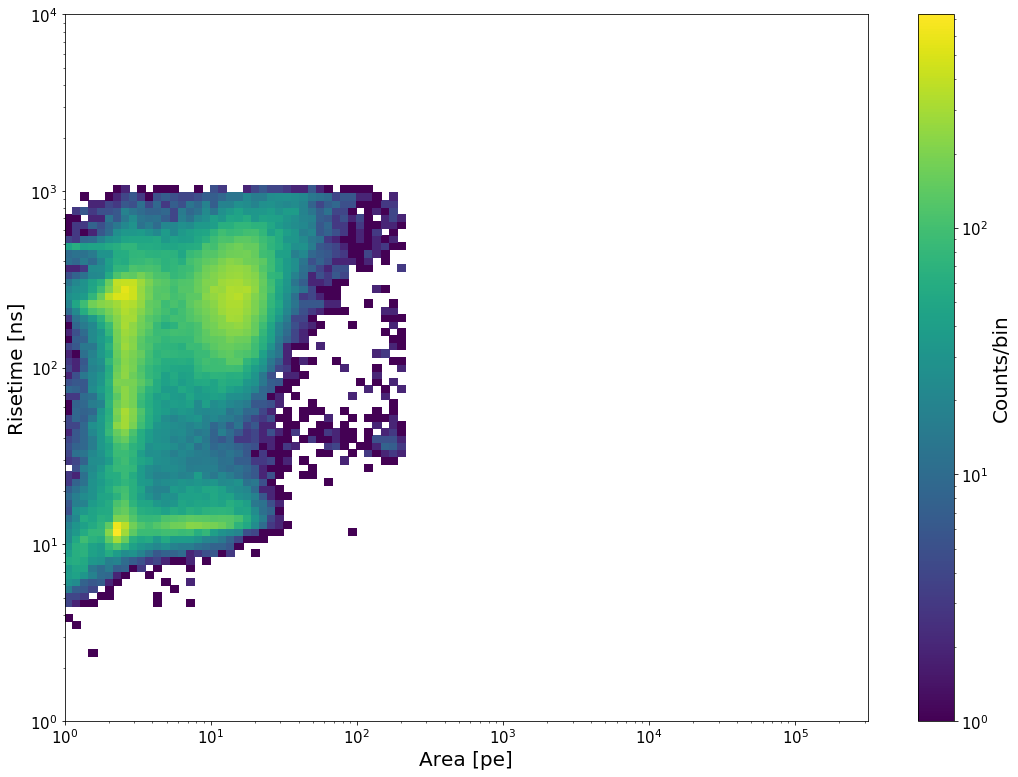

1838864


In [66]:
fig, ax1 = plt.subplots(figsize=(18,13))

bins_x = np.logspace(0,5.5,100)
bins_y = np.logspace(0,4,100)
histo_max= 2*10**3




counts1, _, _ = np.histogram2d(trains_area, trains_width, bins=(bins_x, bins_y))
im1 = ax1.pcolormesh(bins_x, bins_y, counts1.T, norm=LogNorm())
cb1 = plt.colorbar(im1, ax=ax1, label='Counts/bin')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Area [pe]')
ax1.set_ylabel('Risetime [ns]')

SIZE = 20
EXTRA_SIZE = 30

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)

plt.show()
print(len(waveform))

In [41]:

fig=plt.figure(figsize=(18, 13), dpi=150)

#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both')

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

